<a href="https://colab.research.google.com/github/ranisyafrila28/ai/blob/main/Proyek_AI_Kelompok_7_Tumor_Otak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Proyek Akhir AI - Klasifikasi Tumor Otak pada Pencitraan MRI
# Import Library
import numpy as np
import pandas as pd
import cv2
import os
import shutil
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

RANDOM_SEED = 123
!apt-get install tree
!mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO
!tree -d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.8.0-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
mkdir: cannot create directory ‘TRAIN’: File exists
mkdir: cannot create directory ‘TEST’: File exists
mkdir: cannot create directory ‘VAL’: File exists
mkdir: cannot create directory ‘TRAIN/YES’: File exists
mkdir: cannot create directory ‘TRAIN/NO’: File exists
mkdir: cannot create directory ‘TEST/YES’: File exists
mkdir: cannot create directory ‘TEST/NO’: File exists
mkdir: cannot create directory ‘VAL/YES’: File exists
mkdir: cannot create directory ‘VAL/NO’: File exists
.
├── FinalProjectAI
├── FinalProjectAI_No
├── sample_data
├── TEST
│   ├── NO
│   └── YES
├── TRAIN
│   ├── NO
│   └── YES
└── VAL
    ├── NO
    └── YES

12 directories


In [ ]:
# Menghapus direktori yang sudah ada
!rm -rf FinalProjectAI
!rm -rf FinalProjectAI_No

# Kloning repositori dataset dari GitHub
!git clone https://github.com/yohana0/FinalProjectAI.git
!git clone https://github.com/yohana0/FinalProjectAI_No.git

# Mendefinisikan jalur (path)
# Positif Tumor
IMG_PATH_YES = './FinalProjectAI/'
# Negatif Tumor
IMG_PATH_NO = './FinalProjectAI_No/'

# Mencari file dalam format .jpg
JPG_PATH_YES = glob.glob(IMG_PATH_YES + '*.jpg')
JPG_PATH_NO = glob.glob(IMG_PATH_NO + '*.jpg')

Cloning into 'FinalProjectAI'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 145 (delta 2), reused 49 (delta 2), pack-reused 96
Receiving objects: 100% (145/145), 3.75 MiB | 4.89 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Cloning into 'FinalProjectAI_No'...
remote: Enumerating objects: 89, done.
remote: Total 89 (delta 0), reused 0 (delta 0), pack-reused 89
Unpacking objects: 100% (89/89), 3.10 MiB | 3.63 MiB/s, done.


In [ ]:
# Menampilkan beberapa file gambar positif dan negatif terkena tumor
# Positif Tumor
print(JPG_PATH_YES[0:5])
print("-----"*35)
# Negatif Tumor
print(JPG_PATH_NO[0:5])

['./FinalProjectAI/Y154.jpg', './FinalProjectAI/Y24.jpg', './FinalProjectAI/Y28.jpg', './FinalProjectAI/Y74.jpg', './FinalProjectAI/Y82.jpg']
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
['./FinalProjectAI_No/No16.jpg', './FinalProjectAI_No/39 no.jpg', './FinalProjectAI_No/N17.jpg', './FinalProjectAI_No/32 no.jpg', './FinalProjectAI_No/10 no.jpg']


In [ ]:
# Membuat list yang akan menggabungkan gambar positif & negatif tumor
YES_NO_List = []

for JPG_YES in JPG_PATH_YES:
  YES_NO_List.append(JPG_YES)

for JPG_NO in JPG_PATH_NO:
  YES_NO_List.append(JPG_NO)

In [ ]:
# Membuat label pada gambar
JPG_Labels = list(map(lambda x: 'YES' if os.path.split(os.path.split(x)[0])[1] == 'FinalProjectAI' else 'NO', YES_NO_List))
# Menampilkan beberapa label
print(JPG_Labels[0:10])

['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES']


In [ ]:
# Menampilkan jumlah gambar yang ter-label YES/NO
print("YES COUNTING: ", JPG_Labels.count("YES"))
print("NO COUNTING: ", JPG_Labels.count("NO"))

YES COUNTING:  86
NO COUNTING:  85


In [ ]:
# Membuat Objek Series
JPG_Path_Series = pd.Series(YES_NO_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [ ]:
# Menggabungkan Path dan Category Series dalam 1 kolom
Combine_Objek_Series = pd.concat([JPG_Path_Series, JPG_Category_Series], axis=1)
# Menampilkan hasilnya
print(Combine_Objek_Series.head(-1))

                               JPG TUMOR_CATEGORY
0        ./FinalProjectAI/Y154.jpg            YES
1         ./FinalProjectAI/Y24.jpg            YES
2         ./FinalProjectAI/Y28.jpg            YES
3         ./FinalProjectAI/Y74.jpg            YES
4         ./FinalProjectAI/Y82.jpg            YES
..                             ...            ...
165   ./FinalProjectAI_No/4 no.jpg             NO
166    ./FinalProjectAI_No/N99.jpg             NO
167   ./FinalProjectAI_No/7 no.jpg             NO
168  ./FinalProjectAI_No/45 no.jpg             NO
169    ./FinalProjectAI_No/N97.jpg             NO

[170 rows x 2 columns]


In [ ]:
# Mengacak urutan pada Data Frame
Combine_Objek_Series = Combine_Objek_Series.sample(frac=1).reset_index(drop=True)
# Menampilkan Hasilnya
print(Combine_Objek_Series.head(-1))

                               JPG TUMOR_CATEGORY
0    ./FinalProjectAI_No/21 no.jpg             NO
1         ./FinalProjectAI/Y69.jpg            YES
2         ./FinalProjectAI/Y82.jpg            YES
3        ./FinalProjectAI/Y104.jpg            YES
4        ./FinalProjectAI/Y153.jpg            YES
..                             ...            ...
165       ./FinalProjectAI/Y76.jpg            YES
166       ./FinalProjectAI/Y96.jpg            YES
167  ./FinalProjectAI_No/45 no.jpg             NO
168   ./FinalProjectAI_No/No12.jpg             NO
169       ./FinalProjectAI/Y10.jpg            YES

[170 rows x 2 columns]


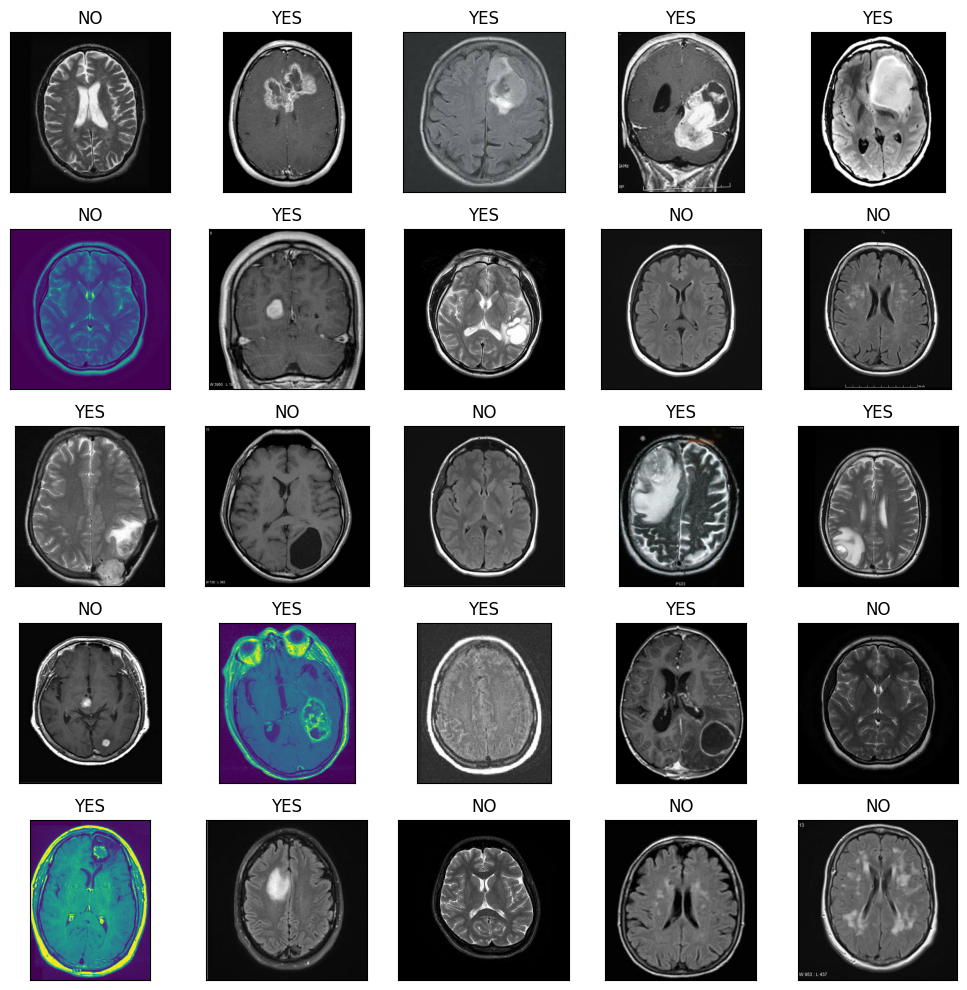

In [ ]:
# Visualisasi gambar pada DataFrame
# Menampilkan 25 gambar
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

# Melakukan iterasi
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Combine_Objek_Series["JPG"][i]))
    ax.set_title(Combine_Objek_Series["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split data: Data Training, Data Uji, Data Validasi
train_data, test_data = train_test_split(Combine_Objek_Series, train_size=0.8, random_state=42)

# Menampilkan data training
print(train_data.shape)
print(train_data.head())

(136, 2)
                               JPG TUMOR_CATEGORY
100        ./FinalProjectAI/Y3.jpg            YES
75        ./FinalProjectAI/Y62.jpg            YES
42   ./FinalProjectAI_No/14 no.jpg             NO
2         ./FinalProjectAI/Y82.jpg            YES
95        ./FinalProjectAI/Y17.jpg            YES


In [ ]:
# Menampilkan data test
print(test_data.shape)
print(test_data.head())

(35, 2)
                               JPG TUMOR_CATEGORY
101  ./FinalProjectAI_No/27 no.jpg             NO
55        ./FinalProjectAI/Y79.jpg            YES
56    ./FinalProjectAI_No/8 no.jpg             NO
139       ./FinalProjectAI/Y29.jpg            YES
157       ./FinalProjectAI/Y53.jpg            YES


In [ ]:
# Image Data Generator untuk Melatih Model
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [ ]:
# Untuk Data Training
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 123 validated image filenames belonging to 2 classes.


In [ ]:
# Untuk Data Validasi
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 13 validated image filenames belonging to 2 classes.


In [ ]:
# Untuk Data Uji
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 35 validated image filenames belonging to 2 classes.


In [ ]:
# Proses Pengecekan shape, data batch, dan label batch
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)
DATA SHAPE:  (13, 200, 200, 1)
LABEL SHAPE:  (13, 2)
DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [ ]:
# Menampilkan informasi indeks kelas, array dan ukuran gambar
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'NO': 0, 'YES': 1}
[0, 1, 1, 0, 0]
(200, 200, 1)
{'NO': 0, 'YES': 1}
[1, 1, 0, 1, 1]
(200, 200, 1)
{'NO': 0, 'YES': 1}
[0, 1, 0, 1, 1]
(200, 200, 1)


In [ ]:
# Membangun model deep learning
Model = Sequential()

Model.add(Conv2D(32, (5, 5), activation="relu", input_shape=(200, 200, 1)))
Model.add(MaxPool2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(64, (3, 3), activation="relu"))
Model.add(MaxPool2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(128, (3, 3), activation="relu"))
Model.add(MaxPool2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(256, (3, 3), activation="relu"))
Model.add(MaxPool2D((2, 2)))
Model.add(Dropout(0.2))

Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512, activation="relu"))
Model.add(Dense(2, activation="softmax"))

In [ ]:
# Compile Model
Model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Membuat objek EarlyStopping
early_stopping = EarlyStopping(patience=3)

# Fitting Model
history = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                      epochs=20,
                      callbacks=[early_stopping])

Epoch 1/20
7/7 [==============================] - 16s 2s/step - loss: 1.2862 - accuracy: 0.4553 - val_loss: 0.6921 - val_accuracy: 0.6923
Epoch 2/20
7/7 [==============================] - 15s 2s/step - loss: 0.6890 - accuracy: 0.5528 - val_loss: 0.6835 - val_accuracy: 0.6923
Epoch 3/20
7/7 [==============================] - 15s 2s/step - loss: 0.6771 - accuracy: 0.5935 - val_loss: 0.6732 - val_accuracy: 0.7692
Epoch 4/20
7/7 [==============================] - 15s 2s/step - loss: 0.6658 - accuracy: 0.6829 - val_loss: 0.6834 - val_accuracy: 0.6923
Epoch 5/20
7/7 [==============================] - 15s 2s/step - loss: 0.6172 - accuracy: 0.6911 - val_loss: 1.2088 - val_accuracy: 0.3846
Epoch 6/20
7/7 [==============================] - 15s 2s/step - loss: 0.7077 - accuracy: 0.6911 - val_loss: 0.5904 - val_accuracy: 0.7692
Epoch 7/20
7/7 [==============================] - 16s 2s/step - loss: 0.5889 - accuracy: 0.6829 - val_loss: 0.4915 - val_accuracy: 0.8462
Epoch 8/20
7/7 [==================

In [ ]:
# Menampilkan akurasi dan nilai loss
train_loss, train_accuracy = Model.evaluate(Train_Set)
val_loss, val_accuracy = Model.evaluate(Validation_Set)

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

1/1 [==============================] - 0s 407ms/step - loss: 0.1083 - accuracy: 1.0000
Train Loss: 0.16215774416923523
Train Accuracy: 0.9430894255638123
Validation Loss: 0.10827644169330597
Validation Accuracy: 1.0


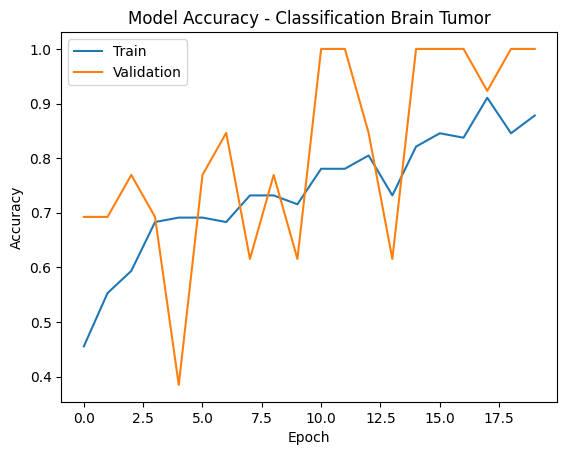

In [ ]:
# Plot Nilai Akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - Classification Brain Tumor')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

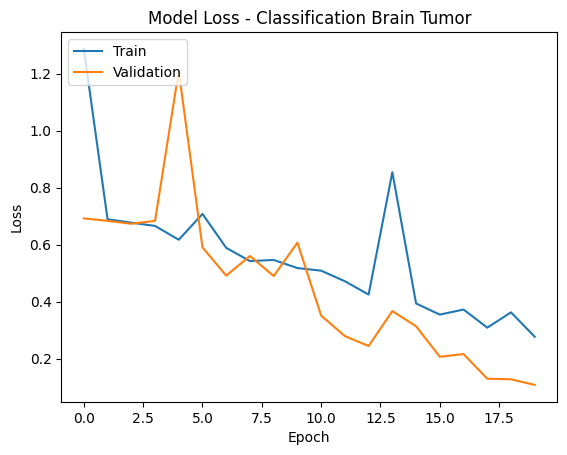

In [ ]:
# Plot Nilai Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - Classification Brain Tumor')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

2/2 [==============================] - 1s 352ms/step


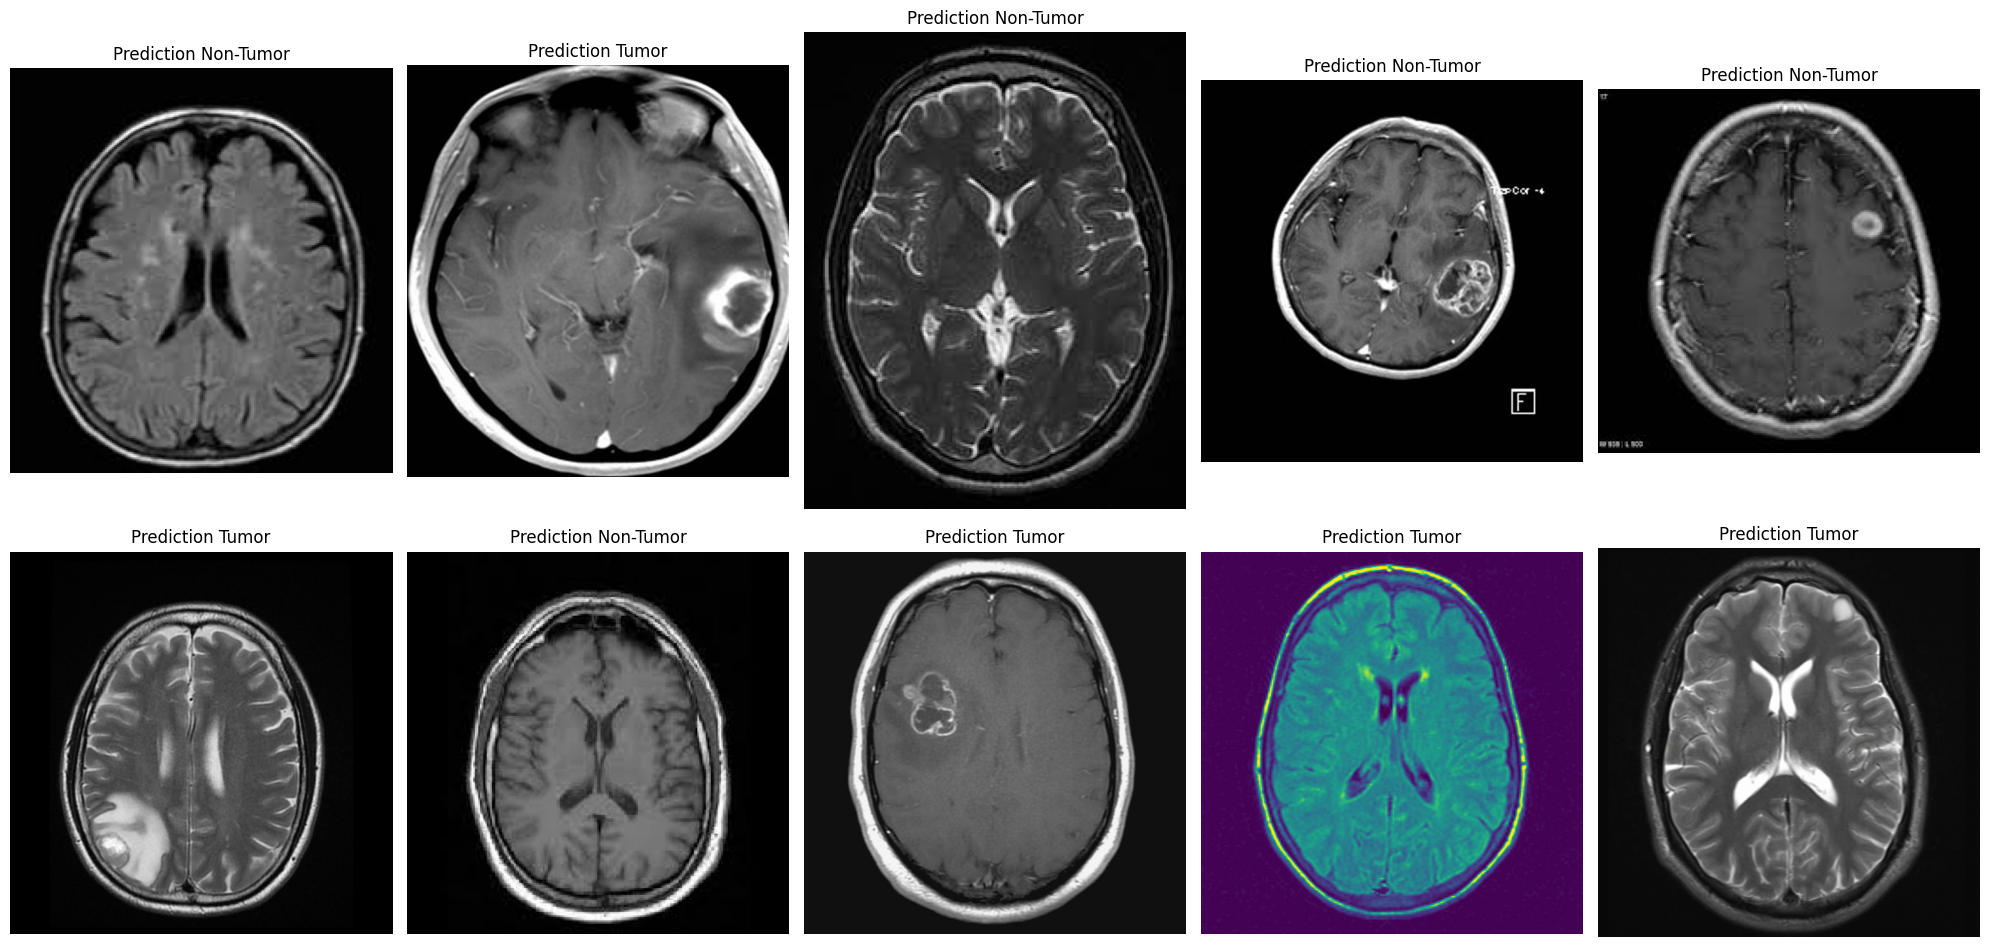

In [ ]:
# Menggunakan Model untuk Prediksi Tumor
predictions = Model.predict(Test_Set)
predicted_classes = np.argmax(predictions, axis=1)

# Menampilkan 10 gambar
num_images = min(len(predicted_classes), 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(num_images):
    image_path = Test_Set.filenames[i]
    image = plt.imread(image_path)

    axes[i // 5, i % 5].imshow(image)
    axes[i // 5, i % 5].set_title("Prediction Tumor" if predicted_classes[i] == 1 else "Prediction Non-Tumor")
    axes[i // 5, i % 5].axis("off")

plt.tight_layout()
plt.show()